# **Neural Networks in Tensorflow and Keras**


>**1.** Introduction to Tensorflow and Keras \\
**2.** Training a Neural Network - The Workflow \\
**3.** Training a Neural Network - Example \\
**4.** Training a Neural Network - Hands On! 


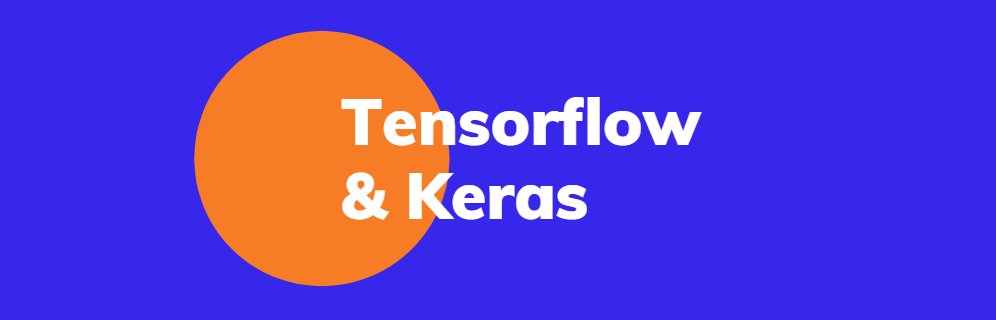



### **Tensorflow**


*   Open Source Framework for ML and DL
*   Created by Google (2015)
*   Evolved by Google Brain
*   Implemented for Python, Javascript, C++, and Java (among the others).

> ## Features


*   Optimized for tensors based operations
*   Parallelized computation
*   Two execution modes:
> * *Graph Execution*: extracts tensor computations from Python and builds an efficient graph before evaluation <br>
(**Faster** but not beginner friendly - more suitable for deployment)
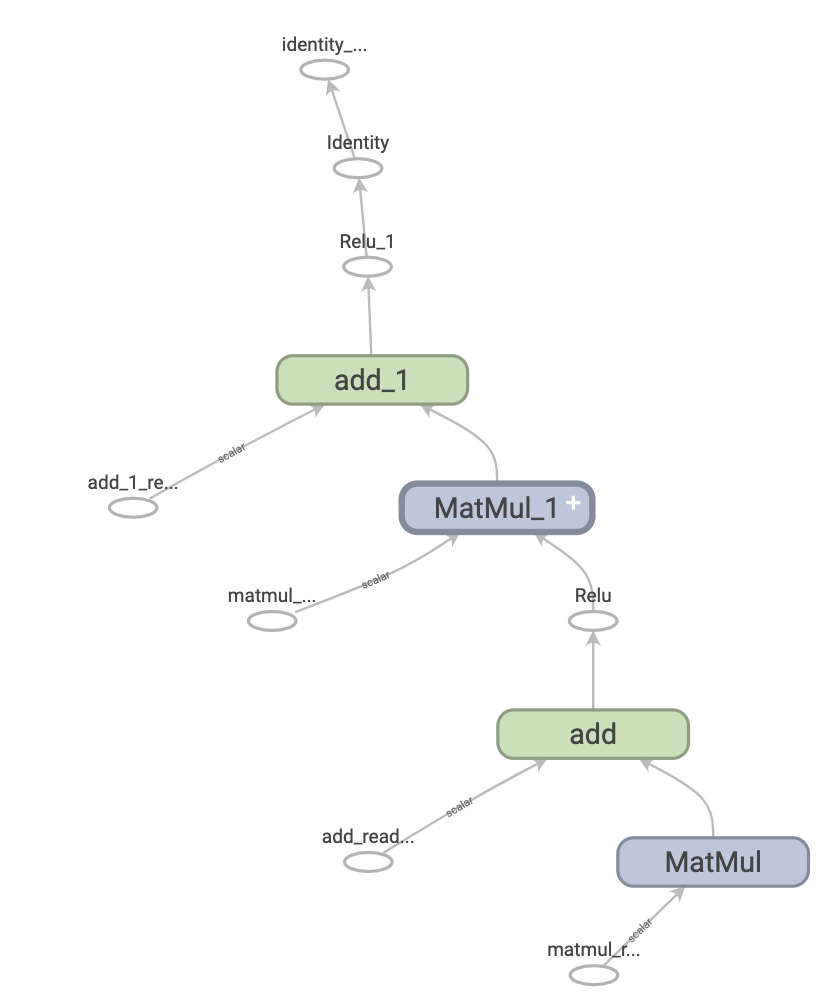
> * *Eager Execution* (default): evaluates operations immediately. It does not build graphs, and the operations return actual values instead of computational graphs to run later. <br>
(**Slower** but beginner friendly - more suitable for prototyping)






### What is a **TENSOR**? 
> **N-dimensional array** very similar to numpy  *ndarrays*

*   Used for very complex operations
*   Dedicated hardware - Tensor Processing Unit - (**TPU**) for optimized computation



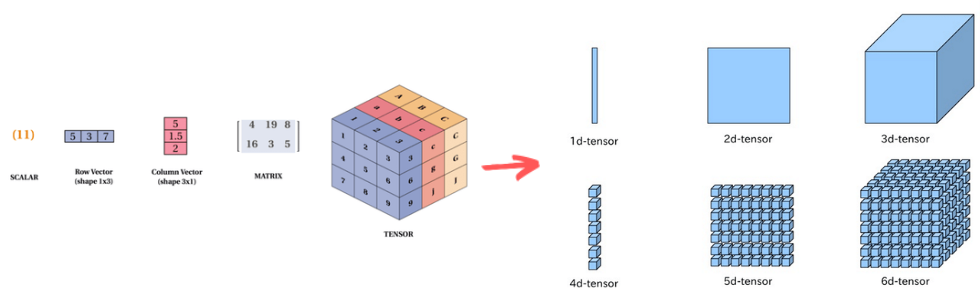



### **Keras**


*   Keras is an open-source library that provides a Python interface for artificial neural networks. 
*   Keras acts as an interface for the TensorFlow library.
*   It provides a high level of abstraction to ease the development of NNs

> ## Key Elements
*   Sequential Model
*   Add function to add layers
*   Different types of layers
*   Activations, Losses, Optimizers and Metrics
*   Training and evaluating functions

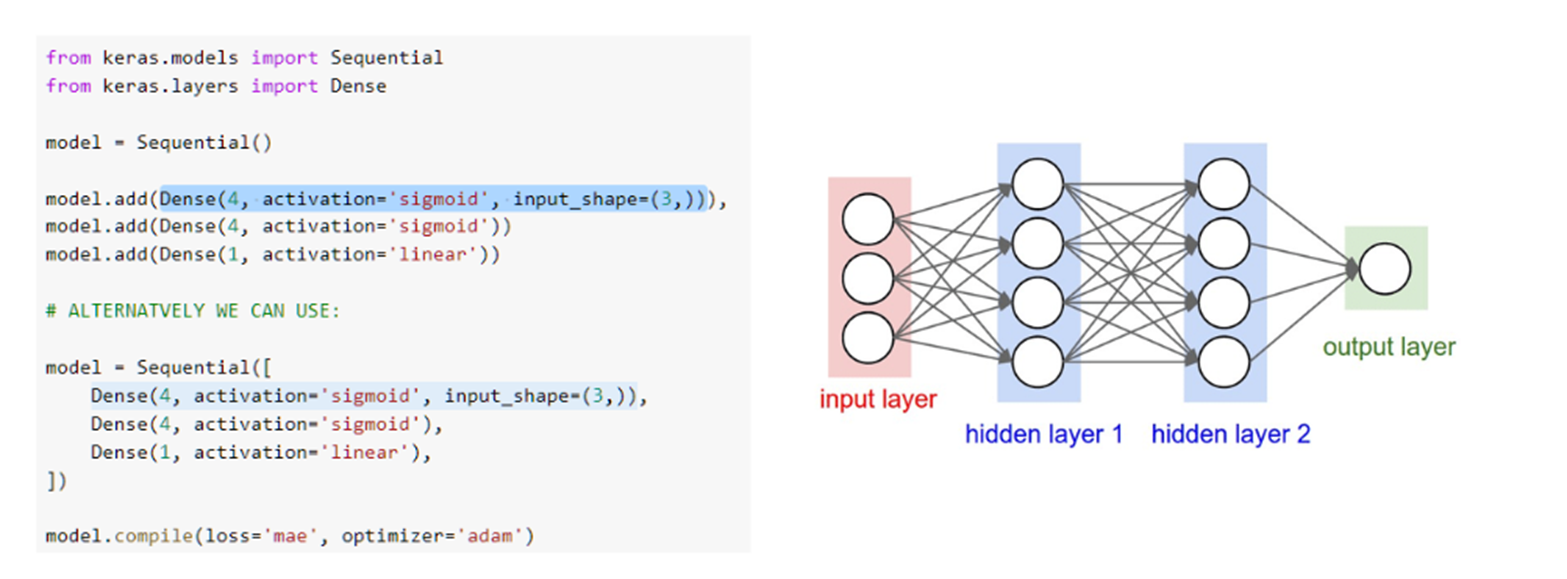

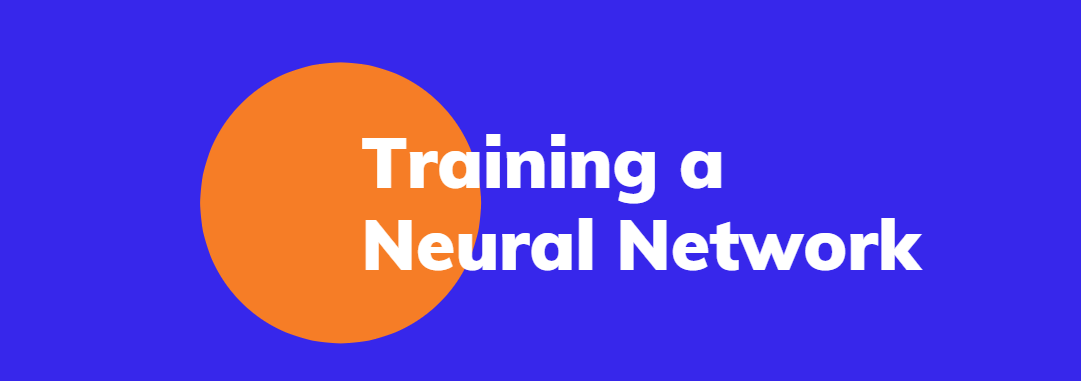

# **Workflow**
#### Main phases 
> **1.**   Data Preprocessing \\
**2.**   Fit an Train the model \\
**3.**   Evaluate the model performances \\



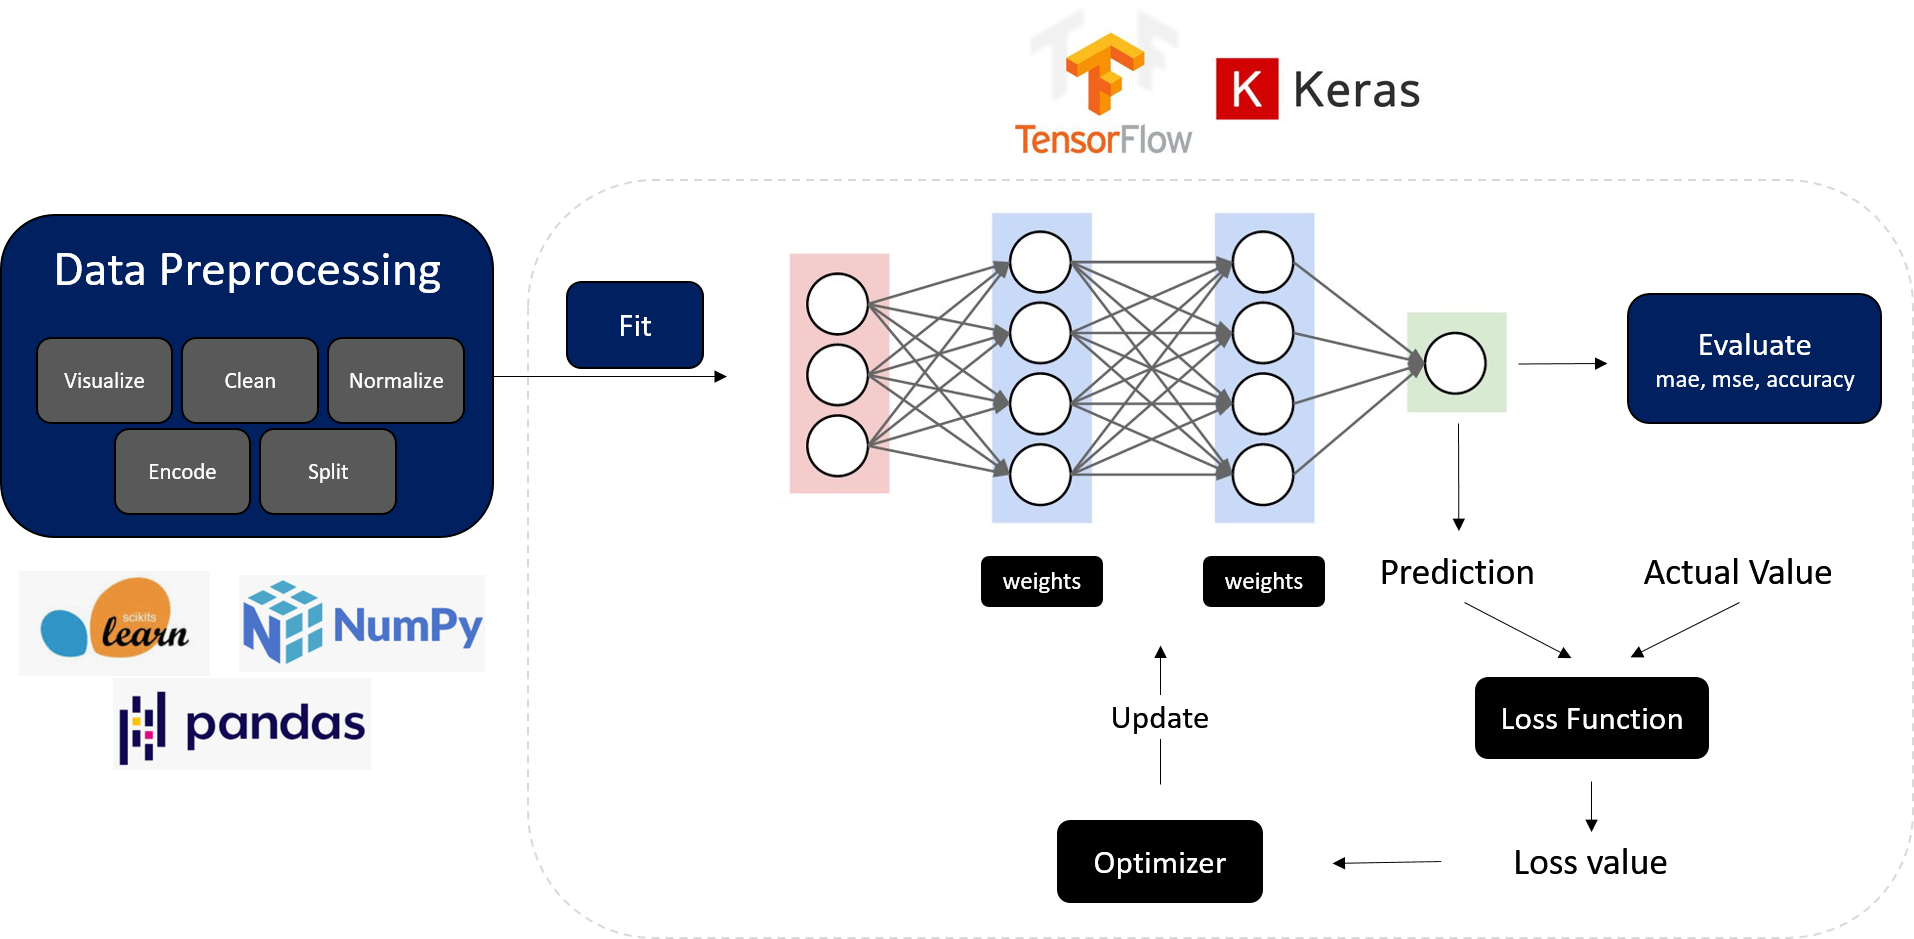

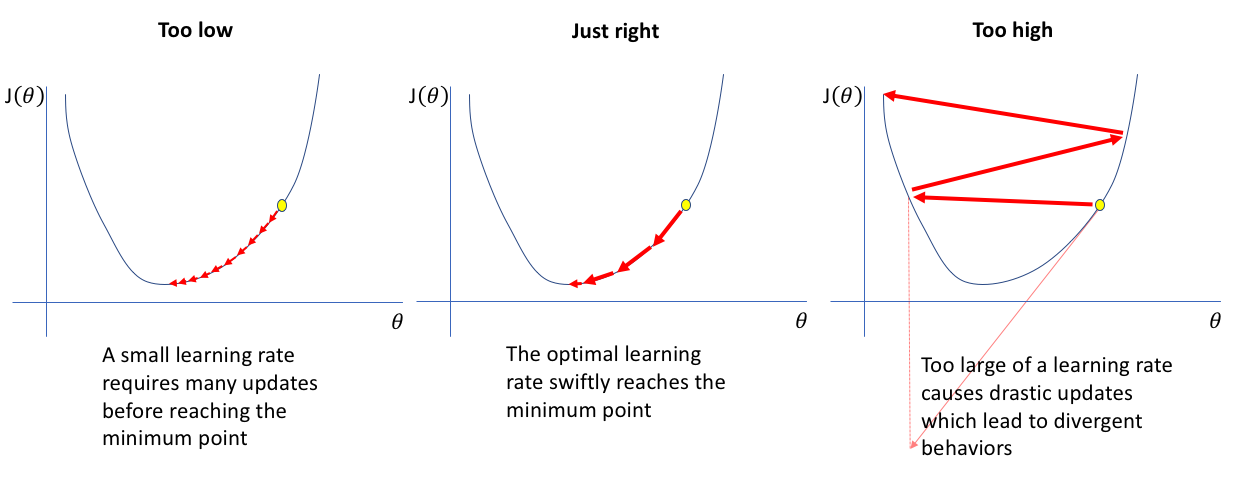

# **Example**
### House Price Dataset 
---
### We will go through the following steps:

- Exploring and Prerocessing the Data
- Building, Training and Evaluating our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network

---
**First**: Copy the path of the file *housepricedata.csv* to the *housepricedata_path * variable below


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
housepricedata_path = 'housepricedata.csv'

# Exploring and Preprocessing the Data
---
We use the **pandas** library to read and explore the dataset 

In [2]:
import pandas as pd

df = pd.read_csv(housepricedata_path)

df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


The dataset has the following variables (columns):

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

---
Pandas dataframes provides a lot of useful methods to acquire deeper knowledge about the dataset

In [ ]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [ ]:
df.isna().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [ ]:
df.corr()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
LotArea,1.000000,0.105806,-0.005636,0.260833,0.126031,0.014259,0.119690,0.190015,0.271364,0.180403,0.189180
OverallQual,0.105806,1.000000,-0.091932,0.537808,0.550600,0.273458,0.101676,0.427452,0.396765,0.562022,0.672486
OverallCond,-0.005636,-0.091932,1.000000,-0.171098,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.151521,-0.141429
TotalBsmtSF,0.260833,0.537808,-0.171098,1.000000,0.323722,-0.048804,0.050450,0.285573,0.339519,0.486665,0.438301
FullBath,0.126031,0.550600,-0.194149,0.323722,1.000000,0.136381,0.363252,0.554784,0.243671,0.405656,0.615951
HalfBath,0.014259,0.273458,-0.060769,-0.048804,0.136381,1.000000,0.226651,0.343415,0.203649,0.163549,0.308644
BedroomAbvGr,0.119690,0.101676,0.012980,0.050450,0.363252,0.226651,1.000000,0.676620,0.107570,0.065253,0.144853
TotRmsAbvGrd,0.190015,0.427452,-0.057583,0.285573,0.554784,0.343415,0.676620,1.000000,0.326114,0.337822,0.417355
Fireplaces,0.271364,0.396765,-0.023820,0.339519,0.243671,0.203649,0.107570,0.326114,1.000000,0.269141,0.420297
GarageArea,0.180403,0.562022,-0.151521,0.486665,0.405656,0.163549,0.065253,0.337822,0.269141,1.000000,0.505068


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [ ]:
print(type(df))
dataset = df.values
type(dataset)

<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Now, we split the dataset into our input features and the label we wish to 

---

predict.

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

While no other preprocessing is needed, we wish to set aside some parts of our dataset the test set. We use the function train_test_split from **scikit-learn** to do that.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1241, 10) (219, 10) (1241,) (219,)


Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from **scikit-learn** which scales our data to be between 0 and 1.

**Question** : Is that right to normalize both X_train and X_test? if yes, what information we use to normalize?   

In [ ]:
# Standardization
# (X_train - X_train.mean())/X_train.std()
# (X_test - X_train.mean())/X_train.std()


#Per farlo serve che il dataset abbia una distribuzione normale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalization
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

#da capire sta cosa sopra

X_train = min_max_scaler.transform(X_train)
#dobbiamo assumere che x_test non lo abbiamo
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X_train.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_test.max(axis=0)

array([0.53214144, 1.        , 1.        , 0.4       , 1.        ,
       1.        , 0.5       , 0.75      , 1.        , 0.79971791])

In [ ]:
X_test.min(axis=0)

array([0.00138353, 0.22222222, 0.25      , 0.        , 0.        ,
       0.        , 0.125     , 0.16666667, 0.        , 0.        ])

# Building and Training Our First Neural Network

We will be using Keras to build our architecture.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [ ]:
X_train.shape[1]

10

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [ ]:
model.compile(optimizer='adam', # 0.01 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what **data** we are training on, which is X_train and Y_train
- the size of our **mini-batch** 
- how long we want to train it for (**epochs**)
- the portion of the training set to be used for **validation**

This function implements both the **forward** and **backward** phases.

This function will output a **history**, which we save under the variable hist. We'll use this variable a little later.

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_split=0.3)

Epoch 1/100
28/28 [==============================] - 1s 11ms/step - loss: 0.6845 - accuracy: 0.6071 - val_loss: 0.6658 - val_accuracy: 0.6595
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.7039 - val_loss: 0.6282 - val_accuracy: 0.7426
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.7776 - val_loss: 0.5611 - val_accuracy: 0.8257
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.8571 - val_loss: 0.4967 - val_accuracy: 0.8257
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8606 - val_loss: 0.4367 - val_accuracy: 0.8418
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8594 - val_loss: 0.3932 - val_accuracy: 0.8418
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.8583 - val_loss: 0.3678 - val_accuracy: 0.8472
Epoch 8/100


Evaluating our data on the test set:

In [ ]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2934 - accuracy: 0.8995


[0.2933506369590759, 0.8995434045791626]

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [ ]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

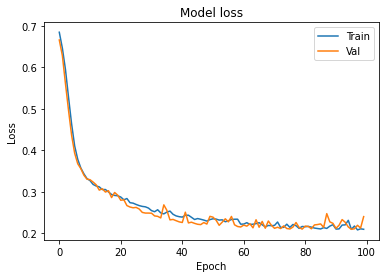

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

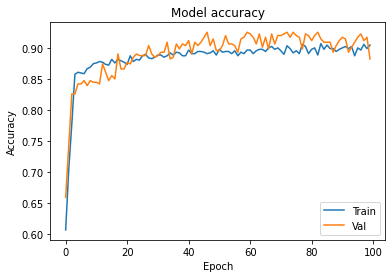

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

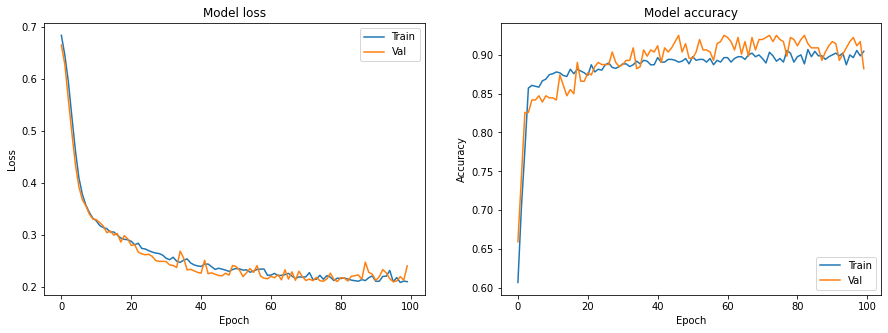

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(hist.history['loss'])
ax[0].plot(hist.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper right')
#ax[0].set_ylim(top=1.2, bottom=0)

ax[1].plot(hist.history['accuracy'])
ax[1].plot(hist.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='lower right')

fig.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_split=0.2)

Epoch 1/100
31/31 [==============================] - 2s 50ms/step - loss: 0.4614 - accuracy: 0.7994 - val_loss: 0.3623 - val_accuracy: 0.8193
Epoch 2/100
31/31 [==============================] - 1s 41ms/step - loss: 0.3753 - accuracy: 0.8448 - val_loss: 0.3287 - val_accuracy: 0.8514
Epoch 3/100
31/31 [==============================] - 1s 41ms/step - loss: 0.3192 - accuracy: 0.8609 - val_loss: 0.2896 - val_accuracy: 0.8835
Epoch 4/100
31/31 [==============================] - 1s 41ms/step - loss: 0.3010 - accuracy: 0.8760 - val_loss: 0.3438 - val_accuracy: 0.8755
Epoch 5/100
31/31 [==============================] - 1s 41ms/step - loss: 0.3168 - accuracy: 0.8770 - val_loss: 0.2816 - val_accuracy: 0.8956
Epoch 6/100
31/31 [==============================] - 1s 41ms/step - loss: 0.2598 - accuracy: 0.8841 - val_loss: 0.2558 - val_accuracy: 0.8996
Epoch 7/100
31/31 [==============================] - 1s 42ms/step - loss: 0.2599 - accuracy: 0.8871 - val_loss: 0.3064 - val_accuracy: 0.8554
Epoch 

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

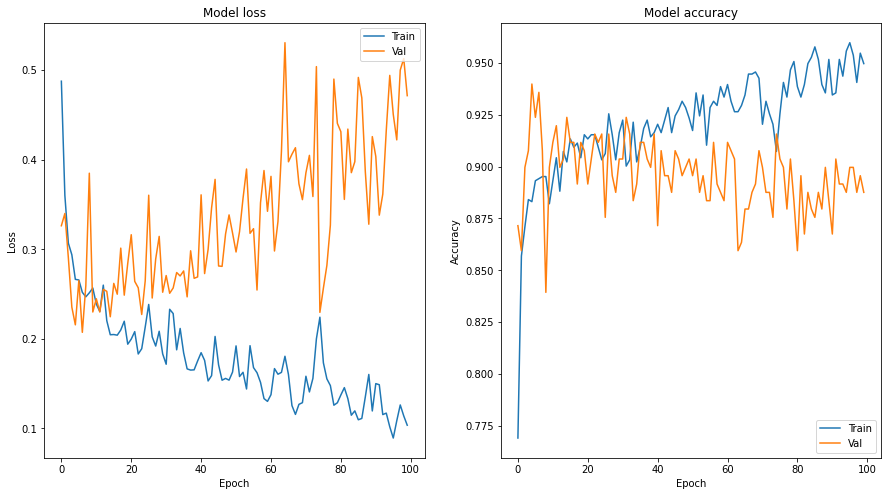

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(hist_2.history['loss'])
ax[0].plot(hist_2.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper right')
#ax[0].set_ylim(top=1.2, bottom=0)

ax[1].plot(hist_2.history['accuracy'])
ax[1].plot(hist_2.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='lower right')

fig.show()

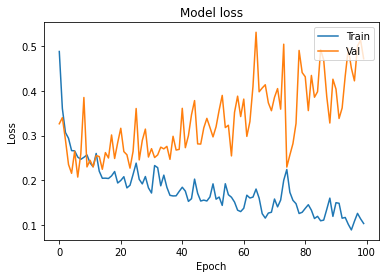

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

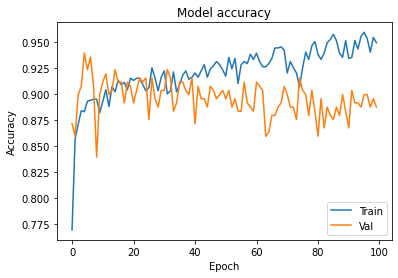

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_split=0.4)

Epoch 1/100
24/24 [==============================] - 3s 73ms/step - loss: 0.4556 - accuracy: 0.8656 - val_loss: 0.3864 - val_accuracy: 0.9135
Epoch 2/100
24/24 [==============================] - 2s 63ms/step - loss: 0.4394 - accuracy: 0.8710 - val_loss: 0.3855 - val_accuracy: 0.9135
Epoch 3/100
24/24 [==============================] - 1s 62ms/step - loss: 0.4320 - accuracy: 0.8710 - val_loss: 0.3796 - val_accuracy: 0.9155
Epoch 4/100
24/24 [==============================] - 2s 65ms/step - loss: 0.4278 - accuracy: 0.8750 - val_loss: 0.4361 - val_accuracy: 0.8672
Epoch 5/100
24/24 [==============================] - 2s 64ms/step - loss: 0.4487 - accuracy: 0.8669 - val_loss: 0.3967 - val_accuracy: 0.9054
Epoch 6/100
24/24 [==============================] - 2s 66ms/step - loss: 0.4314 - accuracy: 0.8804 - val_loss: 0.3882 - val_accuracy: 0.9115
Epoch 7/100
24/24 [==============================] - 2s 63ms/step - loss: 0.4546 - accuracy: 0.8629 - val_loss: 0.4414 - val_accuracy: 0.8672
Epoch 

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

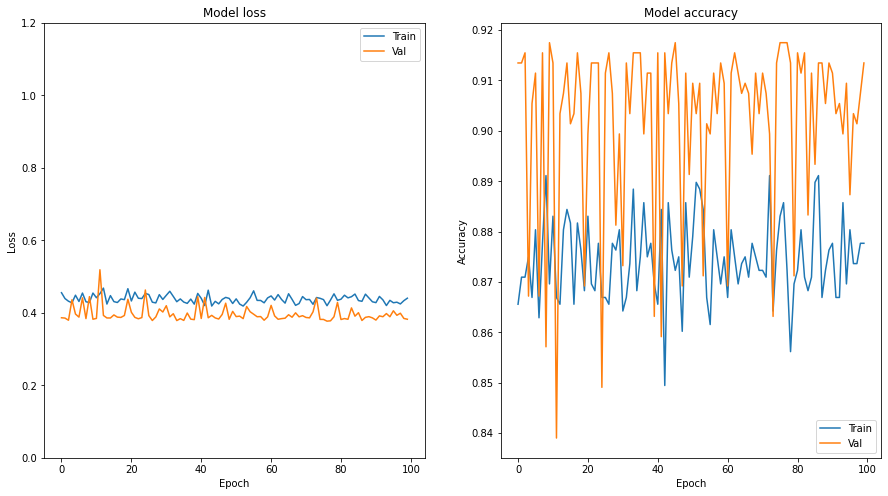

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(hist_3.history['loss'])
ax[0].plot(hist_3.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper right')
ax[0].set_ylim(top=1.2, bottom=0)

ax[1].plot(hist_3.history['accuracy'])
ax[1].plot(hist_3.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='lower right')

fig.show()

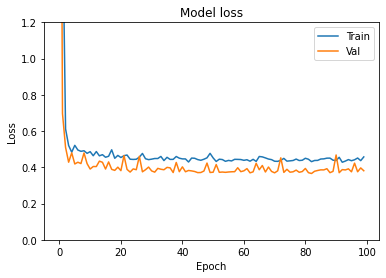

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

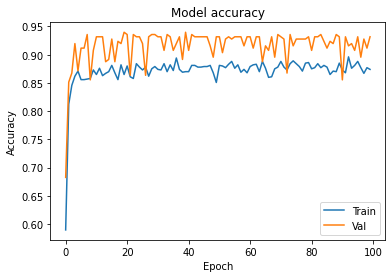

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!

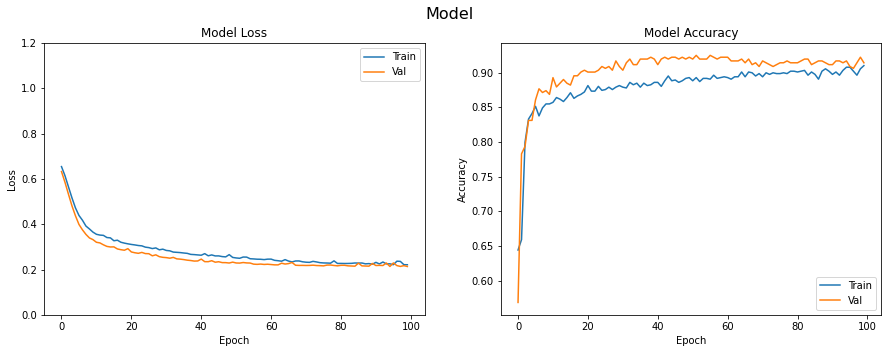

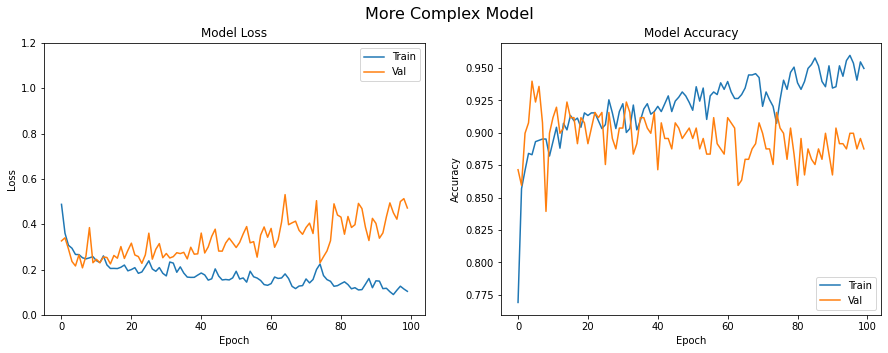

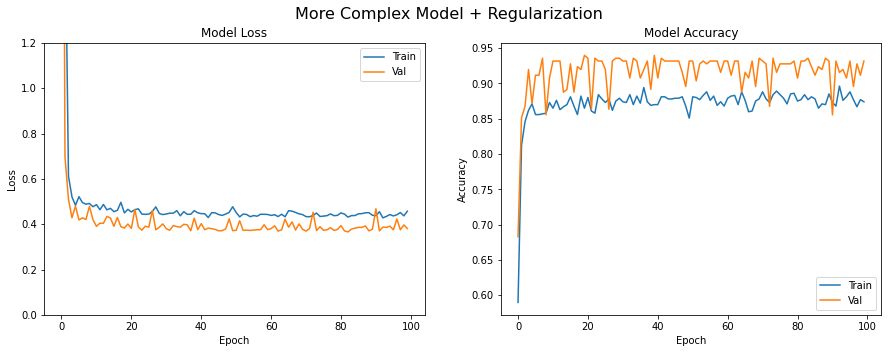

In [ ]:
for h,tit in zip([hist,hist_2,hist_3],['Model','More Complex Model','More Complex Model + Regularization']):
  fig, ax = plt.subplots(1,2, figsize=(15,5))
  fig.suptitle(tit, fontsize=16)
  ax[0].plot(h.history['loss'])
  ax[0].plot(h.history['val_loss'])
  ax[0].set_title('Model Loss')
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['Train', 'Val'], loc='upper right')
  ax[0].set_ylim(top=1.2, bottom=0)

  ax[1].plot(h.history['accuracy'])
  ax[1].plot(h.history['val_accuracy'])
  ax[1].set_title('Model Accuracy')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['Train', 'Val'], loc='lower right')

  fig.show()

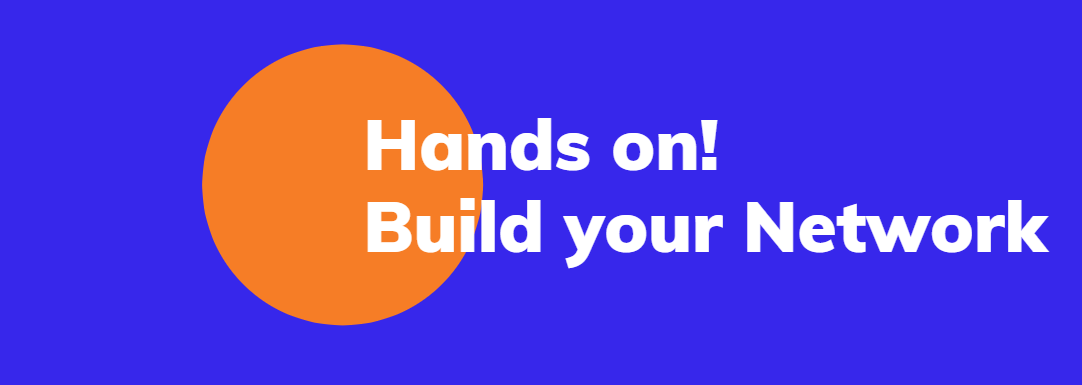

# **Hands On!**
The *diabetes* dataset
---
You find the dataset file into the current folder, named *pima-indians-diabetes.data.csv*


---
Input Variables (columns index reported):

>**0.** Number of times pregnant \\
**1.** Plasma glucose concentration a 2 hours in an oral glucose tolerance test \\
**2.** Diastolic blood pressure (mm Hg) \\
**3.** Triceps skin fold thickness (mm) \\
**4.** 2-Hour serum insulin (mu U/ml) \\
**5.** Body mass index (weight in kg/(height in m)^2) \\
**6.** Diabetes pedigree function \\
**7.** Age (years) \\

Output Variables (y):

> **8.** Diagnosis (0 health or 1 diabetes)


In [2]:
import pandas as pd

diabetes_path="pima-indians-diabetes.data.csv"

df = pd.read_csv(diabetes_path, header=None)

df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Preprocess data
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
dataset = df.values

In [12]:
X = dataset[:,0:10]
Y = dataset[:,8]